In [44]:
import pandas as pd #Initilize dataframe + manipulate data

import seaborn as sns #Plot stats

import numpy as np #Perform least-squares to estimate Beta vector

from numpy.linalg import inv #For taking matrix inverse

import matplotlib.pyplot as plt #Plot UI

from sklearn.model_selection import train_test_split #Train-Test split

Create dataframe

In [45]:
df = pd.read_csv('Housing.csv') #Read CSV file into dataframe

Import Statements

In [46]:
df #View datafram and look at data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [47]:
#features

intercept = [1] * len(df)

X = df[['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].copy()

X.insert(loc=0, column='intercept', value=intercept)

#response
y = df['price']

Data preprocessing

In [48]:
#Manually encode categorical data

X['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
X['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
X['basement'] = df['basement'].map({'yes': 1, 'no': 0})
X['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
X['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
X['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
X['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished':2})


View processed data in dataframe

In [49]:
X

,intercept,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,7420,4,3,1,0,0,0,1,2,1,2
1,1,8960,4,4,1,0,0,0,1,3,0,2
2,1,9960,3,2,1,0,1,0,0,2,1,1
3,1,7500,4,2,1,0,1,0,1,3,1,2
4,1,7420,4,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,0,1,0,0,2,0,0
541,1,2400,3,1,0,0,0,0,0,0,0,1
542,1,3620,2,1,1,0,0,0,0,0,0,0
543,1,2910,3,1,0,0,0,0,0,0,0,2


In [50]:
print(X.isnull().sum())

intercept           0
area                0
bedrooms            0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Set-up train and test split: 80% train - 20% test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Implement Multiple Linear Regression from scratch on training data




Beta = $(X'X)^{-1}$ $(X'y)$




p1: $(X'X)^{-1}$               


p2: $(X'y)$

In [52]:
#Compute p1

X_transpose = np.transpose(X_train)

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

#Compute p2

p2 = np.dot(X_transpose,y_train)

#Calculate beta
beta = np.dot(p1,p2)

#Print beta
beta

array([3.04141903e+05, 2.62935770e+02, 2.62020712e+05, 5.25339177e+05,
       3.19669419e+05, 2.37609879e+05, 4.94253499e+05, 7.63918430e+05,
       8.43419330e+05, 2.86386311e+05, 5.53806196e+05, 2.32288039e+05])

Display Equation

In [53]:
# Build equation
equation = f"y = {beta[0]:.4f}"

for i in range(1, len(beta)):

    if beta[i] >= 0:

        equation += f" + {beta[i]:.4f}*x{i}"

    else:

        equation += f" - {abs(beta[i]):.4f}*x{i}"

$y$ = $304141.9027$ + $262.9358x_1$ + $262020.7118x_2$ + $525339.1767x_3$  + $319669.4186x_4$ + $237609.8789x_5$ + $494253.4993x_6$ + $763918.4304x_7$ + $843419.3297x_8$ + $286386.3113x_9$  + $553806.1959x_{10}$ + $232288.0388x_{11}$

Testing the model: We trained the model on 80% of the datset, so we must obtain $y_h$ by multiplying X_test and Beta

In [54]:
y_hat = np.dot(X_test,beta)

for i in range(len(y_test)):
    print(f"y_hat = {y_hat[i]:.2f} | y_test = {y_test.iloc[i]:.2f}")

y_hat = 4734863.96 | y_test = 4060000.00
y_hat = 6556775.09 | y_test = 6650000.00
y_hat = 2967740.47 | y_test = 3710000.00
y_hat = 4850938.03 | y_test = 6440000.00
y_hat = 3441014.36 | y_test = 2800000.00
y_hat = 3702141.01 | y_test = 4900000.00
y_hat = 6056193.42 | y_test = 5250000.00
y_hat = 5784867.66 | y_test = 4543000.00
y_hat = 2729430.59 | y_test = 2450000.00
y_hat = 2790045.87 | y_test = 3353000.00
y_hat = 8231525.97 | y_test = 10150000.00
y_hat = 2707581.24 | y_test = 2660000.00
y_hat = 3175062.90 | y_test = 3360000.00
y_hat = 3682524.82 | y_test = 3360000.00
y_hat = 3998660.32 | y_test = 2275000.00
y_hat = 3332949.11 | y_test = 2660000.00
y_hat = 2956690.68 | y_test = 2660000.00
y_hat = 5167972.07 | y_test = 7350000.00
y_hat = 4779365.87 | y_test = 2940000.00
y_hat = 3483094.58 | y_test = 2870000.00
y_hat = 6228393.25 | y_test = 6720000.00
y_hat = 6091126.20 | y_test = 5425000.00
y_hat = 2632644.55 | y_test = 1890000.00
y_hat = 5031763.62 | y_test = 5250000.00
y_hat = 5690133

Assess overall adequacy of model my computing: 

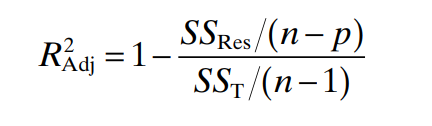

In [55]:
#y_test needs to be a np array so we can use the correct indices
y_test =np.array(y_test)

#Set to 0
SS_res = 0

#So we don't have to continously call len() function
length = len(y_test)

#Sum the square of the difference between real and predicted
for i in range(length):
    SS_res += (y_test[i] - y_hat[i])**2

#Set to 0
SS_total = 0

#Total will be used for calculating mean first
total = 0

for i in range(length):
    total += y_test[i]

mean = total/length

#Sum the square of the difference between real and average of our test data
for i in range (length):
    SS_total += (y_test[i] - mean)**2

print("SS_res:",SS_res)
print("SS_total:",SS_total)

#Calculate R^2 adjusted
R_adj = 1- ((SS_res/(545-11))/(SS_total/(545-1)))

print("Adjusted R^2:",R_adj)

#Calculate MSRes (a.k.a σ^2)

MS_res = SS_res/(545-11)

print("MS_res:",MS_res)

SS_res: 207313023173048.6
SS_total: 550948156853211.0
Adjusted R^2: 0.6166693963895544
MS_res: 388226635155.5217


For the sake of ruling out overfitting, we will also calculate for training data

In [56]:
#New y_hat but for training data
y_hat_train = np.dot(X_train,beta)

for i in range(len(y_train)):
    print(f"y_hat = {y_hat_train[i]:.2f} | y_test = {y_train.iloc[i]:.2f}")


#y_test needs to be a np array so we can use the correct indices
y_train =np.array(y_train)

#Set to 0
SS_res_train = 0

#So we don't have to continously call len() function
length_train = len(y_train)

#Sum the square of the difference between real and predicted
for i in range(length_train):
    SS_res_train += (y_train[i] - y_hat_train[i])**2

#Set to 0
SS_total_train = 0

#Total will be used for calculating mean first
total_train = 0

for i in range(length_train):
    total_train += y_train[i]

mean_train = total_train/length_train

#Sum the square of the difference between real and average of our test data
for i in range (length_train):
    SS_total_train += (y_train[i] - mean_train)**2

print("SS_res_train:",SS_res_train)
print("SS_total_train:",SS_total_train)

#Calculate R^2 adjusted
R_adj_train = 1- ((SS_res_train/(545-11))/(SS_total_train/(545-1)))

print("Adjusted R^2_train:",R_adj_train)

#Calculate MSRes (a.k.a σ^2)

MS_res_train = SS_res_train/(545-11)

print("MS_res_train:",MS_res_train)

y_hat = 6683226.50 | y_test = 7525000.00
y_hat = 6257469.98 | y_test = 6300000.00
y_hat = 5051576.35 | y_test = 3920000.00
y_hat = 4194873.86 | y_test = 3430000.00
y_hat = 3446560.95 | y_test = 3010000.00
y_hat = 4504401.55 | y_test = 4620000.00
y_hat = 3472854.52 | y_test = 1750000.00
y_hat = 2950205.18 | y_test = 3010000.00
y_hat = 2451678.96 | y_test = 2520000.00
y_hat = 3750374.01 | y_test = 3710000.00
y_hat = 4451701.96 | y_test = 3703000.00
y_hat = 3697797.35 | y_test = 2450000.00
y_hat = 5099498.03 | y_test = 4200000.00
y_hat = 4125774.05 | y_test = 3640000.00
y_hat = 4295333.81 | y_test = 3640000.00
y_hat = 5126930.16 | y_test = 5383000.00
y_hat = 2478877.10 | y_test = 1767150.00
y_hat = 4988018.45 | y_test = 5250000.00
y_hat = 3567578.37 | y_test = 3500000.00
y_hat = 7492620.87 | y_test = 6790000.00
y_hat = 5899724.71 | y_test = 3920000.00
y_hat = 3481647.16 | y_test = 3920000.00
y_hat = 5428864.36 | y_test = 5810000.00
y_hat = 7371073.80 | y_test = 5250000.00
y_hat = 5977848.

We see that the model is clearly NOT overfitting, as our $R^2_A$ > $R^2_A (training)$

We can proceed with creating a residual plot

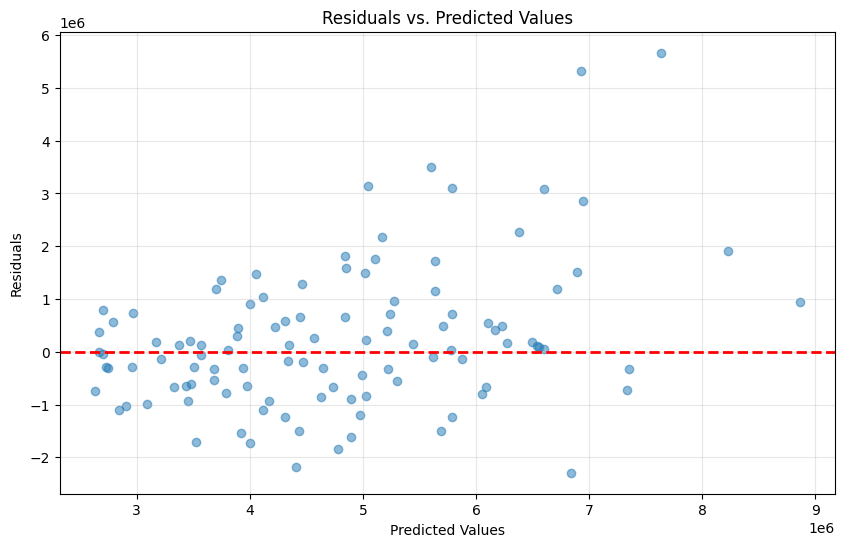

In [ ]:
residuals = y_test - y_hat

plt.figure(figsize=(10, 6))

plt.scatter(y_hat, residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residuals vs. Predicted Values')

plt.grid(True, alpha=0.3)

plt.show()

From this figure, we can see that the plot shows heteroscedasticity (slight funnel shape). This indicates that at higher house prices, the model becomes less reliable. To try and fix this, we introduce log transformation for the house price